In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns




# Step 1: Load the data

In [10]:
ratings = pd.read_csv("ratings.dat", sep="::", engine="python",
                      names=["user_id", "movie_id", "rating", "timestamp"])
movies = pd.read_csv('movies.dat', sep='::', engine='python', encoding='latin-1',
                     names=['movie_id', 'Title', 'Genres'])
users = pd.read_csv("users.dat", sep="::", engine="python",
                    names=["user_id", "gender", "age", "occupation", "zip_code"])

In [5]:
ratings.shape

(1000209, 4)

In [6]:
movies.shape

(3883, 3)

In [7]:
users.shape

(6040, 5)

In [8]:
ratings.head()

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [11]:
movies.head()

,movie_id,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


# Step 2: Merge ratings and movies

In [12]:
data = pd.merge(ratings, movies, on="movie_id")

In [13]:
data.head()

,user_id,movie_id,rating,timestamp,Title,Genres
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,1,661,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical
2,1,914,3,978301968,My Fair Lady (1964),Musical|Romance
3,1,3408,4,978300275,Erin Brockovich (2000),Drama
4,1,2355,5,978824291,"Bug's Life, A (1998)",Animation|Children's|Comedy


# Step 3: EDA - top 10 movies by rating count

In [15]:
top_movies = data.groupby("Title")["rating"].count().sort_values(ascending=False).head(10)

In [17]:
top_movies

Title
American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Saving Private Ryan (1998)                               2653
Terminator 2: Judgment Day (1991)                        2649
Matrix, The (1999)                                       2590
Back to the Future (1985)                                2583
Silence of the Lambs, The (1991)                         2578
Name: rating, dtype: int64

# Step 4: Content-Based Filtering using Genre

In [19]:
tfidf = TfidfVectorizer(stop_words="english")
tfidf_matrix = tfidf.fit_transform(movies["Genres"])
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

Reset index for lookup

In [20]:
movies = movies.reset_index()

# Step 5: Recommendation function

In [23]:
def recommend_movies(title, cosine_sim=cosine_sim):
    idx = movies[movies["Title"].str.contains(title, case=False, na=False)].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:6]  # top 5 recommendations
    movie_indices = [i[0] for i in sim_scores]
    return movies["Title"].iloc[movie_indices].tolist()

In [25]:
# Example usage
recommendations = recommend_movies("Toy Story")

recommendations

['Aladdin and the King of Thieves (1996)',
 'American Tail, An (1986)',
 'American Tail: Fievel Goes West, An (1991)',
 'Rugrats Movie, The (1998)',
 "Bug's Life, A (1998)"]

# Step 6: Visualization - Rating distribution

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/rating_distribution.png'

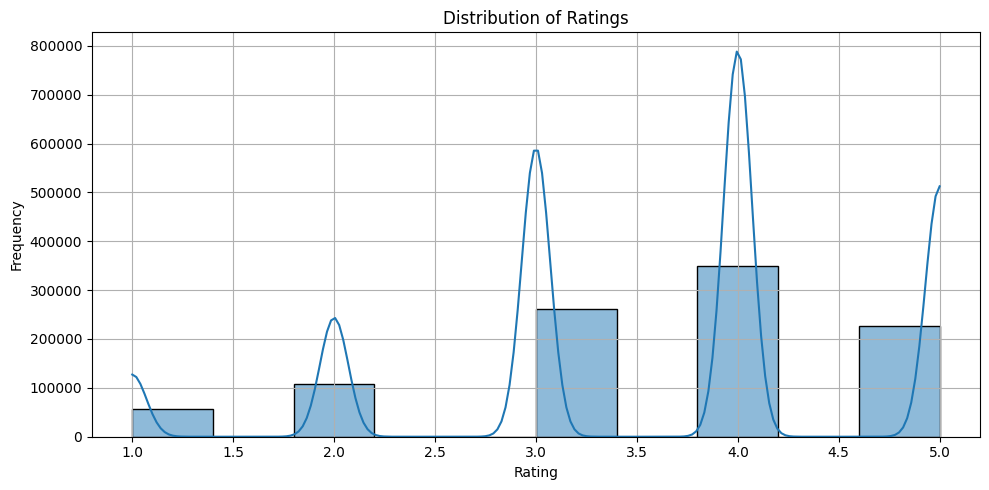

In [26]:
plt.figure(figsize=(10, 5))
sns.histplot(data["rating"], bins=10, kde=True)
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.savefig("/mnt/data/rating_distribution.png")

# Step 7: Evaluation skipped (qualitative for content-based)

# Step 8: Business Insight - Genre frequency

In [28]:
genre_series = movies["Genres"].str.split("|").explode()
top_genres = genre_series.value_counts().head(10)
top_genres_dict = top_genres.to_dict()

recommendations, top_movies.head().to_dict(), top_genres_dict

(['Aladdin and the King of Thieves (1996)',
  'American Tail, An (1986)',
  'American Tail: Fievel Goes West, An (1991)',
  'Rugrats Movie, The (1998)',
  "Bug's Life, A (1998)"],
 {'American Beauty (1999)': 3428,
  'Star Wars: Episode IV - A New Hope (1977)': 2991,
  'Star Wars: Episode V - The Empire Strikes Back (1980)': 2990,
  'Star Wars: Episode VI - Return of the Jedi (1983)': 2883,
  'Jurassic Park (1993)': 2672},
 {'Drama': 1603,
  'Comedy': 1200,
  'Action': 503,
  'Thriller': 492,
  'Romance': 471,
  'Horror': 343,
  'Adventure': 283,
  'Sci-Fi': 276,
  "Children's": 251,
  'Crime': 211})